# Home Alarm CLV

Prepare "Home Alarm, Inc.: Assessing Customer Lifetime Value" for class discussion and as an individual assignment and submit the assignment through GitLab. Be VERY clear about where results are coming from and what assumptions you are making in your Python code. It is in your best interest that we do not have to struggle to figure out where your numbers came from. The assignment (pdf) is on Canvas (week2/homealarm-clv.pdf). Example Excel calculations are also on Canvas (week1/aws-clv.xlsx and week1/notflix-cls.xlsx).

## Setup

Create a Jupyter notebook in which you calculate the CLV for a customer that uses auto-pay and for a customer that does not use auto-pay and answer question 1 through 4 in the assignment PDF.

## Hints

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

Please generate an HTML (Notebook) with your answers to all the questions listed in the homealarm-clv.pdf file on Canvas. When you have finished editing the jupyter notebook and havengenerated the HTML report make sure to save, commit, and push to GitLab. We will collect all files from GitLab after the due date.

Use File > Export Notebook As... > Export Notebook to HTML to get the html report and include to the jupyter notebook file and the HTML file in your submission.

## Analysis

The python dictionary below contains information about attrition notifications from the table on page 3 of the assignment PDF.

Note: GitLab will automatically tests if your work is fully reproducible each time you "push" changes (see .gitlab-ci.yml for the configuration). If you get an email from GitLab stating that there was an error, it suggests a problem in your code. Note that the setup for the Home Alarm assignment will *not* test if your analysis is correct. GitLab will only check if the code is valid and runs without issue in the docker container.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
churn = pd.DataFrame(
    {
        "autopay": [0.032, 0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059, 0.053],
        "no_autopay": [0.084, 0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096, 0.086],
    }
)
churn

,autopay,no_autopay
0,0.032,0.084
1,0.070,0.122
2,0.097,0.162
3,0.103,0.154
4,0.095,0.134
5,0.078,0.120
6,0.069,0.111
7,0.059,0.096
8,0.053,0.086


### Calculate CLV for autopay customers

#### list your assumptions here
Assume the revenue is received and calculated at the end of the year and the revenue for the first year is 480 dollars with an annual growth rate of 3 % for the following years.
The assumption for the autopay customers is listed as the `auto_assum` table below.

In [16]:
# calculate clv here
auto_assum = pd.DataFrame({"Item": ["Annual discount rate", "Monthly discount rate", "Annual growth rate", "Annual revenue first Year", "Cost of service", "Annual direct marketing cost", "Installation cost"], "Number": [0.1, ((1+0.1)**(1/12)-1), 0.03, 480, 0.15, 0.05, 492-195]})
print(auto_assum)

auto_CLV = pd.DataFrame({"Item":["Revenues", "Product/Service Costs", "Marketing Costs", "Customer Profit", "Churn / Attrition rate", "Prob. of being active for the following year", "Profit expected on average", "Discount #", "Present value of Expected Profits", "CLV"]})
auto_CLV.set_index('Item')
#annual clv

auto_CLV["Start of LTV Calc."] = auto_CLV["Year1"] = auto_CLV["Year2"] = auto_CLV["Year3"] = auto_CLV["Year4"] = auto_CLV["Year5"] = auto_CLV["Year6"] = auto_CLV["Year7"] = auto_CLV["Year8"]= auto_CLV["Year9"]= [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
auto_CLV.iloc[0, 2:] = [480 * (1+ auto_assum.loc[2, "Number"])**i for i in range(len(auto_CLV)-1)]
auto_CLV.iloc[1, 2:] = auto_CLV.iloc[0, 2:] * auto_assum.loc[4, "Number"]
auto_CLV.iloc[2, 2:] = auto_CLV.iloc[0, 2:] * auto_assum.loc[5, "Number"]
auto_CLV.iloc[3, 2:] = auto_CLV.iloc[0, 2:]  - (auto_CLV.iloc[1, 2:] + auto_CLV.iloc[2, 2:])
auto_CLV.iloc[4, 2:] = churn["autopay"]
for i in range(len(auto_CLV)-1):
    i = i+ 2
    auto_CLV.iloc[5, i] = auto_CLV.iloc[5, i-1] * (1 - auto_CLV.iloc[4, i])
    auto_CLV.iloc[7, i] = auto_CLV.iloc[7, i-1] + 1
    auto_CLV.iloc[6, i] = auto_CLV.iloc[3, i] * auto_CLV.iloc[5, i-1]
    auto_CLV.iloc[8, i] = auto_CLV.iloc[6, i]/ ((1 + auto_assum.loc[0, "Number"])** auto_CLV.iloc[7, i])
    auto_CLV.iloc[9, i] = auto_CLV.iloc[9, i - 1] + auto_CLV.iloc[8, i]


auto_CLV

                           Item      Number
0          Annual discount rate    0.100000
1         Monthly discount rate    0.007974
2            Annual growth rate    0.030000
3     Annual revenue first Year  480.000000
4               Cost of service    0.150000
5  Annual direct marketing cost    0.050000
6             Installation cost  297.000000


,Item,Start of LTV Calc.,Year1,Year2,Year3,Year4,Year5,Year6,Year7,Year8,Year9
0,Revenues,0,480.000000,494.400000,509.232000,524.508960,540.244229,556.451556,573.145102,590.339455,608.049639
1,Product/Service Costs,0,72.000000,74.160000,76.384800,78.676344,81.036634,83.467733,85.971765,88.550918,91.207446
2,Marketing Costs,0,24.000000,24.720000,25.461600,26.225448,27.012211,27.822578,28.657255,29.516973,30.402482
3,Customer Profit,0,384.000000,395.520000,407.385600,419.607168,432.195383,445.161245,458.516082,472.271564,486.439711
4,Churn / Attrition rate,0,0.032000,0.070000,0.097000,0.103000,0.095000,0.078000,0.069000,0.059000,0.053000
5,Prob. of being active for the following year,1,0.968000,0.900240,0.812917,0.729186,0.659914,0.608440,0.566458,0.533037,0.504786
6,Profit expected on average,0,384.000000,382.863360,366.744813,341.105683,315.150951,293.767959,278.979680,267.521985,259.290333
7,Discount #,0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
8,Present value of Expected Profits,0,349.090909,316.416000,275.540806,232.979771,195.683946,165.824354,143.160688,124.800980,109.964413
9,CLV,0,349.090909,665.506909,941.047715,1174.027486,1369.711432,1535.535786,1678.696474,1803.497454,1913.461867


### Calculate CLV for non-autopay customers

#### list your assumptions here
Assume the revenue is received and calculated at the end of the year and the revenue for the first year is 480 dollars with an annual growth rate of 3 % for the following years.
The assumption for the non-autopay customers is listed as the `nonauto_assum` table below.
The clv for the non-autopay customers is calculated and presented as the `nonauto_CLV` table.

In [18]:
# calculate clv here
nonauto_assum = pd.DataFrame({"Item": ["Annual discount rate", "Monthly discount rate", "Annual growth rate", "Annual revenue first Year", "Cost of service", "Annual direct marketing cost", "Installation cost"], "Number": [0.1, ((1+0.1)**(1/12)-1), 0.03, 480, 0.15, 0.05, 492-195]})
print(nonauto_assum)

nonauto_CLV = pd.DataFrame({"Item":["Revenues", "Product/Service Costs", "Marketing Costs", "Customer Profit", "Churn / Attrition rate", "Prob. of being active for the following year", "Profit expected on average", "Discount #", "Present value of Expected Profits", "CLV"]})
nonauto_CLV.set_index('Item')
#annual clv
nonauto_CLV["Start of LTV Calc."] = nonauto_CLV["Year1"] = nonauto_CLV["Year2"] = nonauto_CLV["Year3"] = nonauto_CLV["Year4"] = nonauto_CLV["Year5"] = nonauto_CLV["Year6"] = nonauto_CLV["Year7"] = nonauto_CLV["Year8"]= nonauto_CLV["Year9"]= [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
nonauto_CLV.iloc[0, 2:] = [480 * (1+ nonauto_assum.loc[2, "Number"])**i for i in range(len(nonauto_CLV)-1)]
nonauto_CLV.iloc[1, 2:] = nonauto_CLV.iloc[0, 2:] * nonauto_assum.loc[4, "Number"]
nonauto_CLV.iloc[2, 2:] = nonauto_CLV.iloc[0, 2:] * nonauto_assum.loc[5, "Number"]
nonauto_CLV.iloc[3, 2:] = nonauto_CLV.iloc[0, 2:]  - (nonauto_CLV.iloc[1, 2:] + nonauto_CLV.iloc[2, 2:])
nonauto_CLV.iloc[4, 2:] = churn["no_autopay"]
for i in range(len(nonauto_CLV)-1):
    i = i+ 2
    nonauto_CLV.iloc[5, i] = nonauto_CLV.iloc[5, i-1] * (1 - nonauto_CLV.iloc[4, i])
    nonauto_CLV.iloc[7, i] = nonauto_CLV.iloc[7, i-1] + 1
    nonauto_CLV.iloc[6, i] = nonauto_CLV.iloc[3, i] * nonauto_CLV.iloc[5, i-1]
    nonauto_CLV.iloc[8, i] = nonauto_CLV.iloc[6, i]/ ((1 + nonauto_assum.loc[0, "Number"])** nonauto_CLV.iloc[7, i])
    nonauto_CLV.iloc[9, i] = nonauto_CLV.iloc[9, i - 1] + nonauto_CLV.iloc[8, i]

nonauto_CLV



                           Item      Number
0          Annual discount rate    0.100000
1         Monthly discount rate    0.007974
2            Annual growth rate    0.030000
3     Annual revenue first Year  480.000000
4               Cost of service    0.150000
5  Annual direct marketing cost    0.050000
6             Installation cost  297.000000


,Item,Start of LTV Calc.,Year1,Year2,Year3,Year4,Year5,Year6,Year7,Year8,Year9
0,Revenues,0,480.000000,494.400000,509.232000,524.508960,540.244229,556.451556,573.145102,590.339455,608.049639
1,Product/Service Costs,0,72.000000,74.160000,76.384800,78.676344,81.036634,83.467733,85.971765,88.550918,91.207446
2,Marketing Costs,0,24.000000,24.720000,25.461600,26.225448,27.012211,27.822578,28.657255,29.516973,30.402482
3,Customer Profit,0,384.000000,395.520000,407.385600,419.607168,432.195383,445.161245,458.516082,472.271564,486.439711
4,Churn / Attrition rate,0,0.084000,0.122000,0.162000,0.154000,0.134000,0.120000,0.111000,0.096000,0.086000
5,Prob. of being active for the following year,1,0.916000,0.804248,0.673960,0.570170,0.493767,0.434515,0.386284,0.349201,0.319169
6,Profit expected on average,0,384.000000,362.296320,327.639054,282.798373,246.424846,219.806034,199.232190,182.430939,169.865096
7,Discount #,0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
8,Present value of Expected Profits,0,349.090909,299.418446,246.160071,193.155094,153.010442,124.074776,102.237616,85.105379,72.039383
9,CLV,0,349.090909,648.509355,894.669426,1087.824520,1240.834962,1364.909738,1467.147353,1552.252733,1624.292115


### Create a line graph of CLV for both autopay and non-autopay customer 

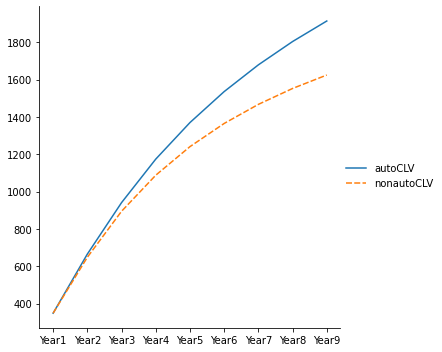

In [19]:
# enter your code here
clv_compar = pd.DataFrame({"autoCLV": auto_CLV.iloc[9, 2:], "nonautoCLV": nonauto_CLV.iloc[9, 2:]})
clv_compar["autoCLV"] = clv_compar["autoCLV"].astype(float)
clv_compar["nonautoCLV"] = clv_compar["nonautoCLV"].astype(float)

sns.relplot(data=clv_compar, kind="line")
plt.show()

### Create a line graph of the retention rate for both autopay and non-autopay customer 

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Year1 to Year9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   autoCLV     9 non-null      float64
 1   nonautoCLV  9 non-null      float64
dtypes: float64(2)
memory usage: 216.0+ bytes


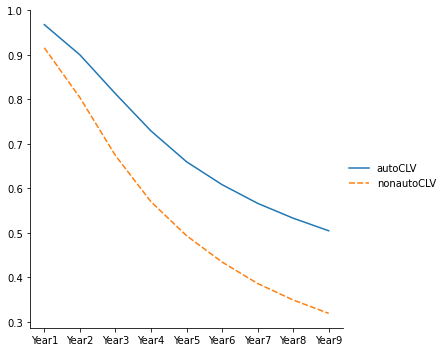

In [20]:
# enter your code here
ret_compar = pd.DataFrame({"autoCLV": auto_CLV.iloc[5, 2:], "nonautoCLV": nonauto_CLV.iloc[5, 2:]})
ret_compar["autoCLV"] = ret_compar["autoCLV"].astype(float)
ret_compar["nonautoCLV"] = ret_compar["nonautoCLV"].astype(float)
ret_compar.info()




#ret_compar = pd.DataFrame({"auto_retention": 1 - churn["autopay"], "nonauto_retention": 1 - churn["no_autopay"]})

sns.relplot(data=ret_compar, kind="line")
plt.show()

### Calculate the maximum amount to spend on autopay incentives

In [22]:
max_pay = auto_CLV.iloc[9, -1] - nonauto_CLV.iloc[9, -1]# the difference of pv of clv in year 9 for nonauto and auto pay
#auto_assum.loc[6, "Number"]
# assume the installation cost has been charge for every exisiting customer

print(f"Maxium amount to spend on autopay incentives is {max_pay.round(2)}")

Maxium amount to spend on autopay incentives is 289.17


### Suggested marketing actions

Suggest three marketing actions Home Alarm should consider to convert existing customers to autopay who are about to start their second year with Home Alarm. Be specific about incentive amounts you recommend using (if any)

... enter suggested marketing actions here ...
1. provide the customers who continue using their service for the next year with Home Alarm discount coupons that can be used to buy other products of Home Alarm. The total value of the coupon should be no more than churn rate * per profit of that year.
2. provide customer survey to the first year customers for improvement suggestion. Use those suggestion to adjust their service model for the next year. Customers who provide the survey can receive a discount of 1% for the service of the next year.
3. use email marketing to promote their service with no more than churn rate * per profit of that year  on the marketing cost.
